In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



In [101]:
# Load the datasets
train_df = pd.read_csv('/content/sample_data/heart_disease_train.csv')
test_df = pd.read_csv('/content/sample_data/heart_disease_test_all.csv')

In [102]:
# Display the first few rows of the training data
train_df.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
1,PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
2,PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
3,PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
4,PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


In [103]:
# Display the first few rows of the testing dataset
test_df.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1800,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
1,PT1801,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
2,PT1802,47,F,ATA,140,257,0,Normal,135,N,1.0,Up,0
3,PT1803,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat,1
4,PT1804,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat,1


##Data Pre-processing

In [104]:
# Check for missing values in the training and testing datasets
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_values_train, missing_values_test

(Id                0
 Age               0
 Gender            0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64,
 Id                0
 Age               0
 Gender            0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64)

In [105]:
# Display the summary statistics
train_df.describe(include='all')

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,734,734.000000,734,734,734.000000,734.000000,734.000000,734,734.000000,734,734.000000,734,734.000000
unique,734,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,PT1000,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,1,NaN,578,403,NaN,NaN,NaN,443,NaN,432,NaN,379,NaN
mean,NaN,53.602180,NaN,NaN,132.957766,198.339237,0.234332,NaN,136.426431,NaN,0.902180,NaN,0.553134
std,NaN,9.528147,NaN,NaN,18.819299,109.263181,0.423870,NaN,25.729613,NaN,1.050003,NaN,0.497508
min,NaN,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,63.000000,NaN,-2.000000,NaN,0.000000
25%,NaN,47.000000,NaN,NaN,120.000000,172.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,NaN,54.000000,NaN,NaN,130.000000,222.500000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,NaN,60.000000,NaN,NaN,141.750000,265.000000,0.000000,NaN,155.000000,NaN,1.500000,NaN,1.000000


##Data Exploration

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(train_df.describe(include='all'))


            Id         Age Gender ChestPainType   RestingBP  Cholesterol  \
count      734  734.000000    734           734  734.000000   734.000000   
unique     734         NaN      2             4         NaN          NaN   
top     PT1000         NaN      M           ASY         NaN          NaN   
freq         1         NaN    578           403         NaN          NaN   
mean       NaN   53.602180    NaN           NaN  132.957766   198.339237   
std        NaN    9.528147    NaN           NaN   18.819299   109.263181   
min        NaN   28.000000    NaN           NaN    0.000000     0.000000   
25%        NaN   47.000000    NaN           NaN  120.000000   172.000000   
50%        NaN   54.000000    NaN           NaN  130.000000   222.500000   
75%        NaN   60.000000    NaN           NaN  141.750000   265.000000   
max        NaN   77.000000    NaN           NaN  200.000000   603.000000   

         FastingBS RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count 

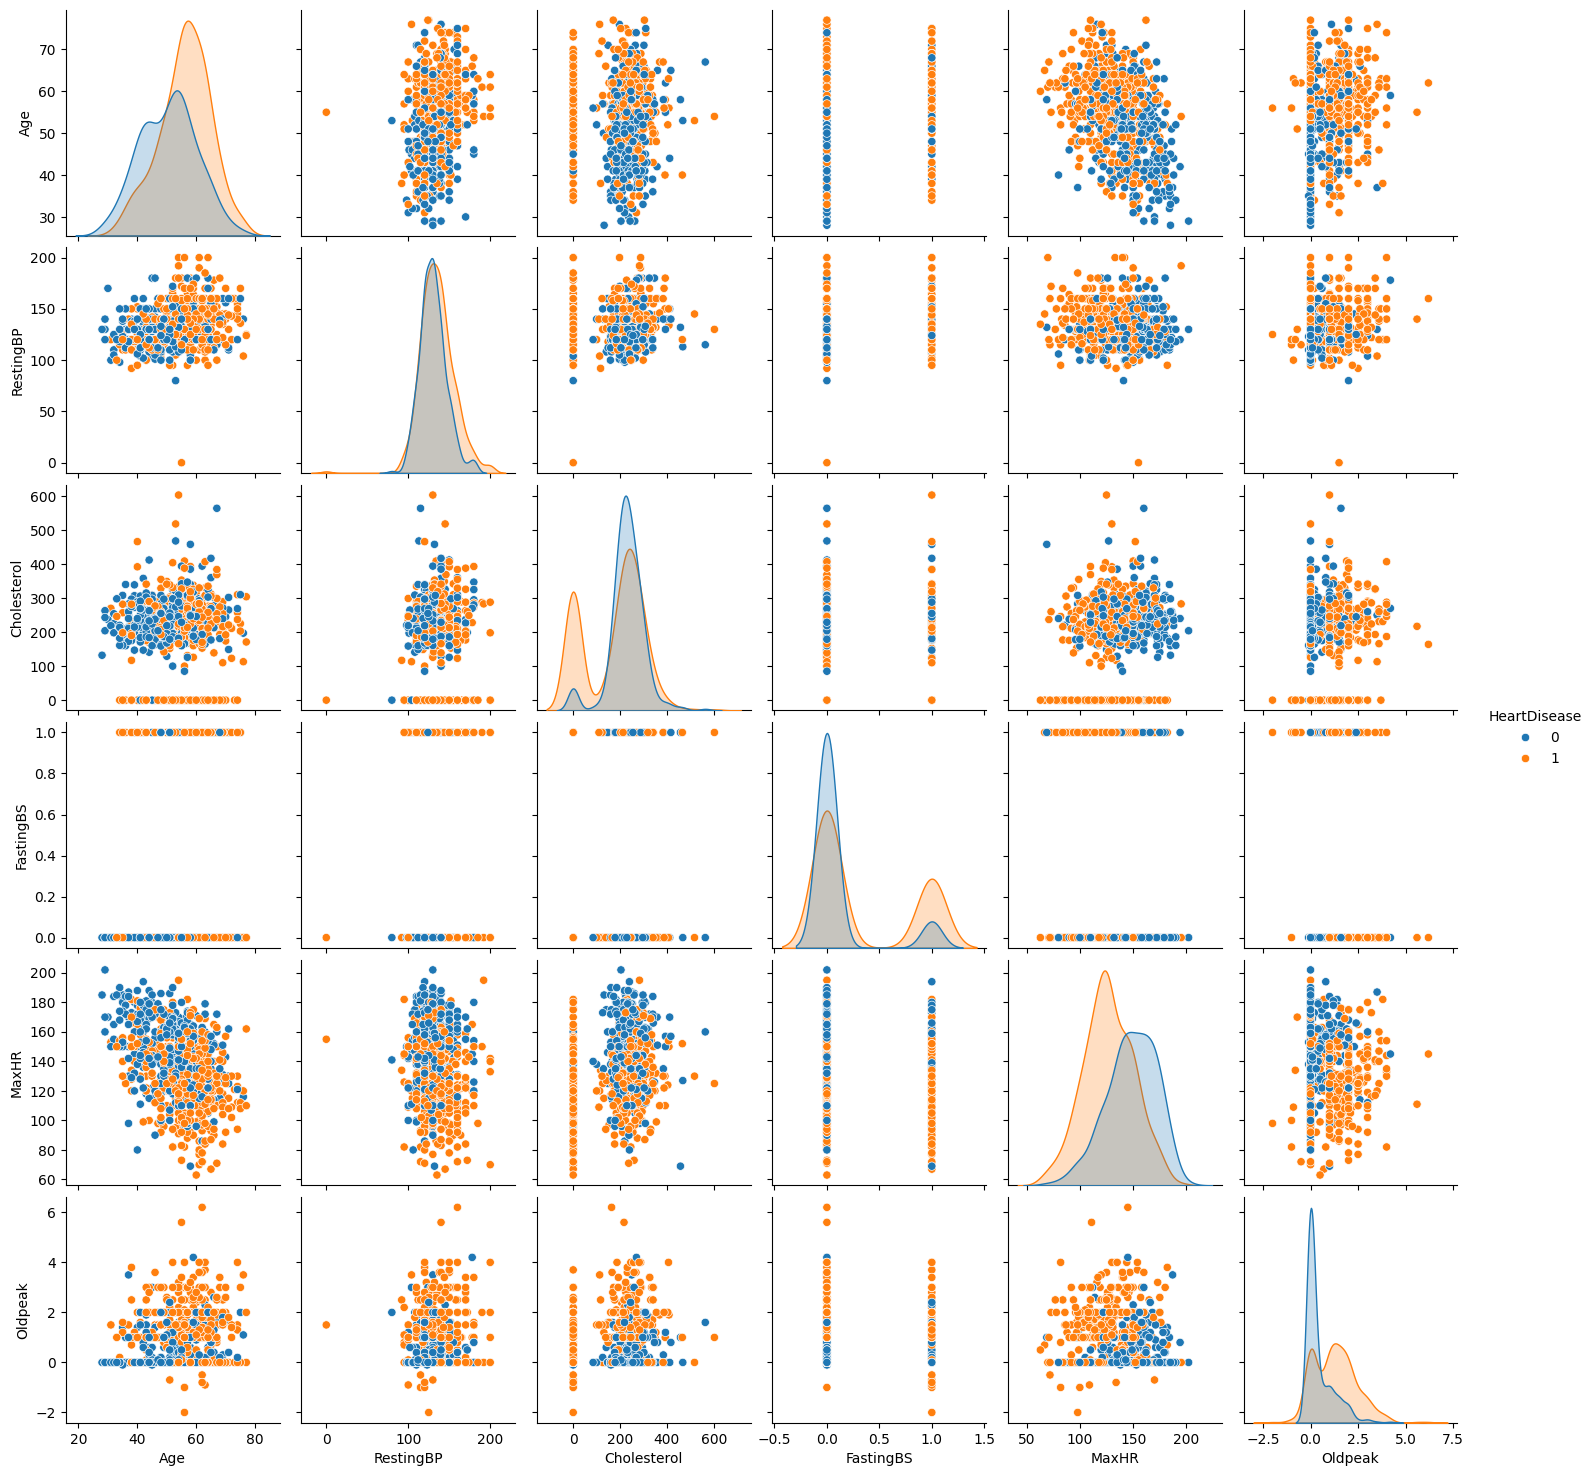

In [107]:
# Pairplot
sns.pairplot(train_df, hue='HeartDisease')
plt.show()


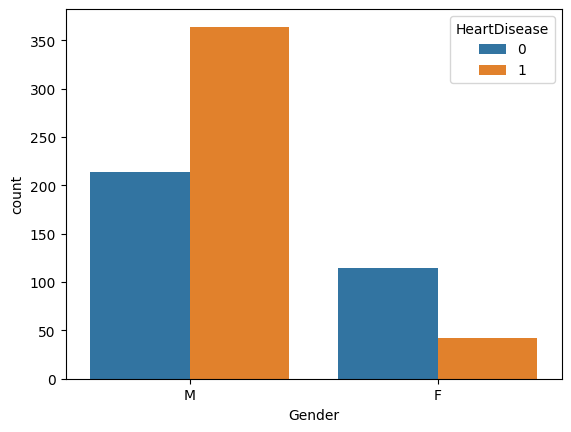

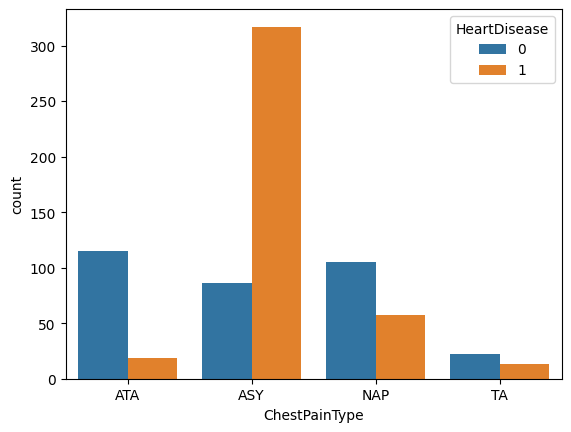

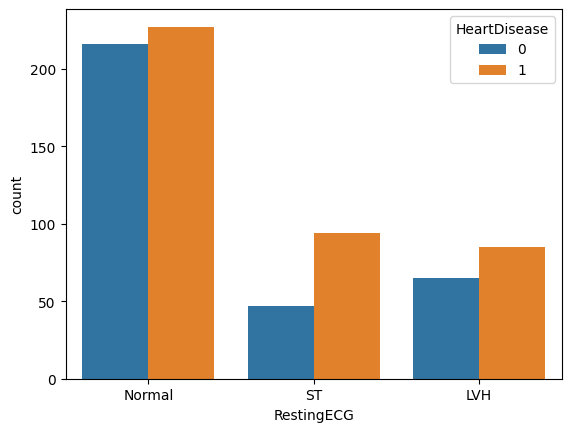

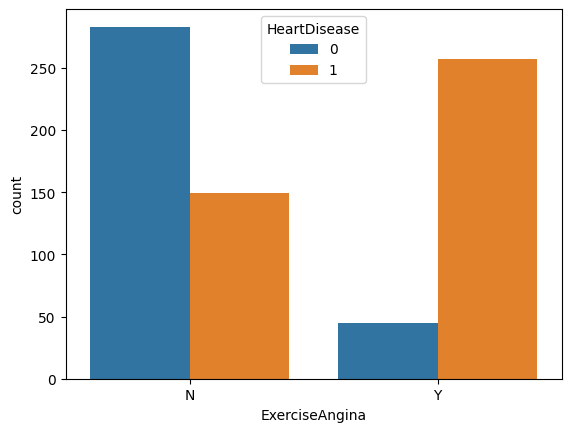

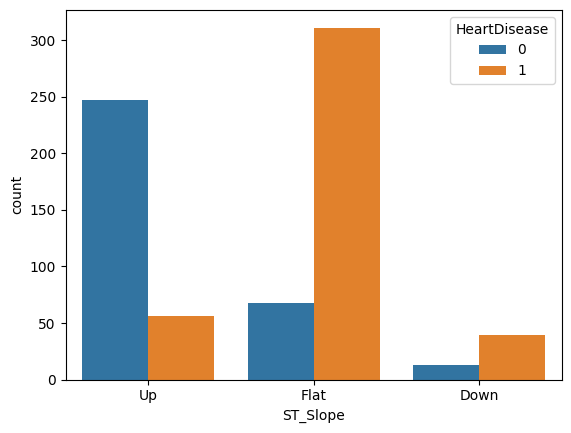

In [108]:
# Countplot for categorical features
categorical_features = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features:
    sns.countplot(data=train_df, x=feature, hue='HeartDisease')
    plt.show()

##Feature Engineering

In [109]:
# Extract features and target variable from training data
X_train = train_df.drop(columns=['Id', 'HeartDisease'])
y_train = train_df['HeartDisease']


In [110]:
# Extract features from testing data
X_test = test_df.drop(columns=['Id', 'HeartDisease'])
y_test = test_df['HeartDisease']

In [111]:
# Column transformer for preprocessing
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [112]:
# Apply the column transformer to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

##Build Predictive Models

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix



In [115]:
# Logistic Regression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, y_pred_log_reg)

In [116]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

In [117]:
# XGBoost
xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb)

##Evaluate Predictive Models


In [118]:
print("Logistic Regression: Accuracy = {:.2f}, ROC-AUC = {:.2f}".format(log_reg_accuracy, log_reg_roc_auc))
print("Random Forest: Accuracy = {:.2f}, ROC-AUC = {:.2f}".format(rf_accuracy, rf_roc_auc))
print("XGBoost: Accuracy = {:.2f}, ROC-AUC = {:.2f}".format(xgb_accuracy, xgb_roc_auc))

print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

Logistic Regression: Accuracy = 0.86, ROC-AUC = 0.87
Random Forest: Accuracy = 0.86, ROC-AUC = 0.87
XGBoost: Accuracy = 0.84, ROC-AUC = 0.85

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86        82
           1       0.91      0.83      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        82
           1       0.90      0.85      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.

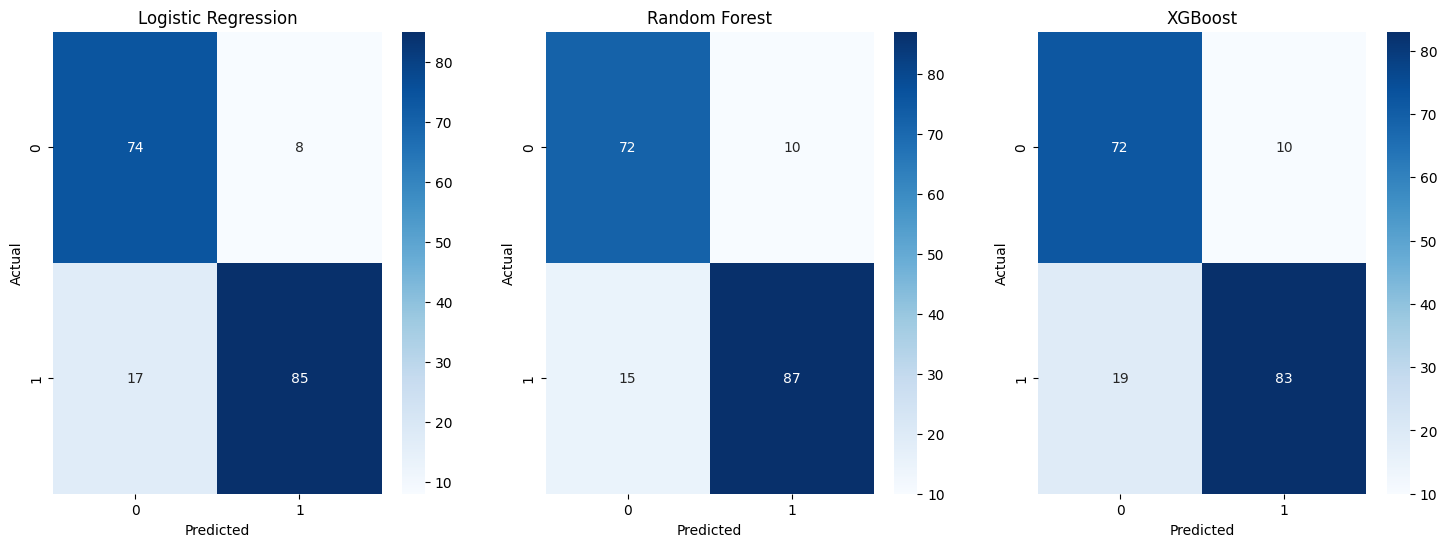

In [119]:
# Confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Logistic Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('XGBoost')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.show()

##Model Explainability

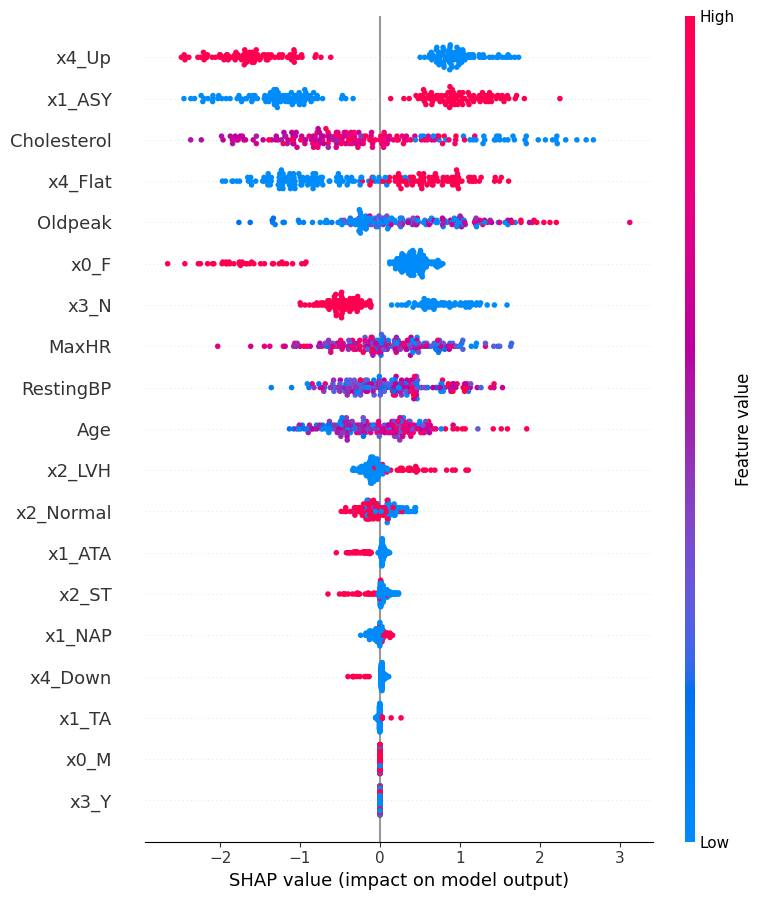

In [120]:
import shap

# Best model selection
best_model = xgb_clf  # Assuming XGBoost performed the best

# Explainability with SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()))

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()))